<a href="https://colab.research.google.com/github/Redzoro1993/ARIMA-COURSE-DATA-/blob/master/Punto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import *
from scipy.stats import norm

In [45]:
from google.colab import files
files.upload()

Saving IBREA.csv to IBREA.csv


{'IBREA.csv': b'Date,IBRON_EA\r\n13-05-2019,4.255\r\n14-05-2019,4.254\r\n15-05-2019,4.255\r\n16-05-2019,4.256\r\n17-05-2019,4.256\r\n20-05-2019,4.257\r\n21-05-2019,4.258\r\n22-05-2019,4.258\r\n23-05-2019,4.26\r\n24-05-2019,4.262\r\n27-05-2019,4.261\r\n28-05-2019,4.262\r\n29-05-2019,4.259\r\n30-05-2019,4.258\r\n31-05-2019,4.257\r\n04-06-2019,4.26\r\n05-06-2019,4.261\r\n06-06-2019,4.262\r\n07-06-2019,4.263\r\n10-06-2019,4.261\r\n11-06-2019,4.256\r\n12-06-2019,4.257\r\n13-06-2019,4.257\r\n14-06-2019,4.256\r\n17-06-2019,4.257\r\n18-06-2019,4.256\r\n19-06-2019,4.256\r\n20-06-2019,4.255\r\n21-06-2019,4.253\r\n25-06-2019,4.253\r\n26-06-2019,4.254\r\n27-06-2019,4.253\r\n28-06-2019,4.255\r\n02-07-2019,4.259\r\n03-07-2019,4.258\r\n04-07-2019,4.257\r\n05-07-2019,4.256\r\n08-07-2019,4.255\r\n09-07-2019,4.254\r\n10-07-2019,4.254\r\n11-07-2019,4.255\r\n12-07-2019,4.253\r\n15-07-2019,4.254\r\n16-07-2019,4.254\r\n17-07-2019,4.255\r\n18-07-2019,4.254\r\n19-07-2019,4.255\r\n22-07-2019,4.256\r\n23-07-201

In [65]:
pub_rate = pd.read_csv("IBREA.csv")
pub_rate["Tasa"] = pub_rate["IBRON_EA"] / 100

In [66]:
pub_rate 

,Date,IBRON_EA,Tasa
0,13-05-2019,4.255,0.04255
1,14-05-2019,4.254,0.04254
2,15-05-2019,4.255,0.04255
3,16-05-2019,4.256,0.04256
4,17-05-2019,4.256,0.04256
...,...,...,...
483,05-05-2021,1.755,0.01755
484,06-05-2021,1.755,0.01755
485,07-05-2021,1.755,0.01755
486,10-05-2021,1.749,0.01749


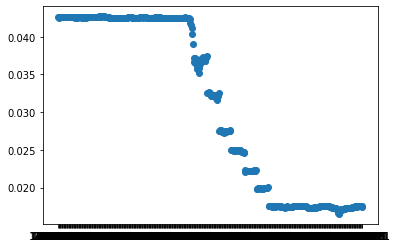

In [67]:
plt.scatter(x = pub_rate['Date'], y = pub_rate['Tasa'])

In [ ]:
pub_rate.info()
pub_rate=np.log(1  + pub_rate['Tasa'])

S = pub_rate
n = len(S)-1
dt = 1/360
   
Sx = np.sum(S.loc[0:(n-1)])
Sy = np.sum(S.loc[1:n])
Sxx = np.sum(S.loc[0:(n-1)]**2)
Sxy = np.sum(S.loc[0:(n-1)].reset_index(drop = True) * S.loc[1:n].reset_index(drop = True))
Syy = np.sum(S.loc[1:n]**2)
   

In [68]:
theta = (Sy * Sxx - Sx * Sxy) / (n* (Sxx - Sxy) - (Sx**2 - Sx*Sy) )
k = -np.log((Sxy - theta * Sx - theta * Sy + n * theta**2) /   
            ( Sxx - 2 * theta * Sx + n * theta**2)) / dt
alpha = np.exp(-k*dt)
sig = (Syy - 2 * alpha * Sxy + (alpha**2) * Sxx - 2 * theta * (1-alpha) * 
       (Sy - alpha * Sx) + n * (theta**2) * (1 - alpha)**2)/n
sigma2 = (sig*2*k) /(1-alpha**2)
sigma = np.sqrt(sigma2)

In [69]:
def vasicek_rate(r, k, theta, sigma, dt, random_seed):
    value_1 = np.exp(-1 * k * dt)
    value_2 = (sigma**2) * (1 - value_1**2) / (2*k)
    interest_rate = r*value_1 + theta*(1-value_1) + np.sqrt(value_2) * random_seed
    return(interest_rate)

def simulation(N, r_spot, k, theta, sigma, num_simul, dt):
    np.random.seed(100)
    random_numbers = np.random.randn(num_simul*N).reshape((N, num_simul))
    interest_rates = pd.DataFrame(np.nan, index = range(0,N), columns = range(0, num_simul))
    for h in range(0, num_simul):
        interest_rates.loc[0,h] = r_spot
        for j in range(1,N):
            interest_rates.loc[j,h] = vasicek_rate(interest_rates.loc[j-1,h], k, 
                                                   theta, sigma, dt,random_numbers[j,h])
    return(interest_rates)

In [71]:
import seaborn as sns

In [91]:
r0 = 0.01748   # Validar Tasa es tasa SPOT
time_periods = 61 # 60 + 1 python 
num_simul = 1000
dt = 1/360
simulate_rates = simulation(time_periods, r0, k, theta, sigma, num_simul, dt)

In [96]:
import seaborn as sns

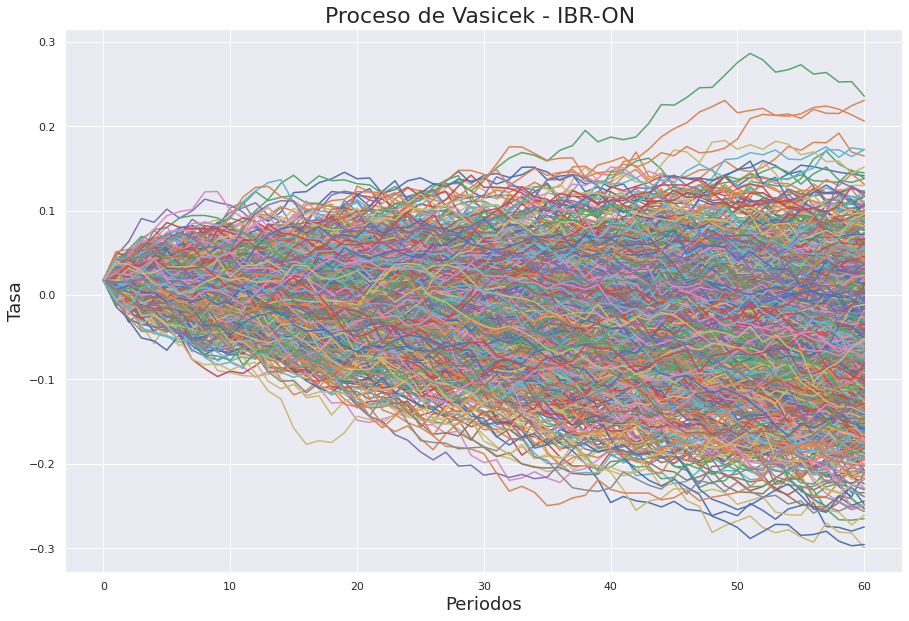

In [97]:
plt.figure(figsize=(15,10)) 
plt.xlabel('Periodos',fontsize = 18)  
plt.ylabel('Tasa',fontsize = 18) 
plt.title("Proceso de Vasicek - IBR-ON ",fontsize = 22)
plt.plot(simulate_rates)
sns.set()
plt.show()

In [ ]:
simulate_rates

#Punto 2B

In [88]:
simulate_rates1 = simulate_rates.transpose()
simulate_rates1.head()
Sim_Rates = [[0.0] * num_simul,[0.0] * num_simul]
Strike = 0.035 # Validar K 

In [89]:
for i in range(num_simul):
    Sim_Rates[0][i] = np.log(np.exp(-simulate_rates1.iloc[i,-2]*59/360)/np.exp(-simulate_rates1.iloc[i,-1]*60/360))*(360/1)
    Sim_Rates[1][i] = np.log(np.exp(-simulate_rates1.iloc[i,9]*10/360)/np.exp(-simulate_rates1.iloc[i,-2]*59/360))*(360/(49))

pay_off_desc = [0.0]*num_simul
for i in range(num_simul):
    pay_off_desc[i]= np.exp(-(49/360)*Sim_Rates[1][i])*max(Sim_Rates[0][i]-Strike,0)*2000000

payoff = np.array(pay_off_desc)
payoff.mean()

381362.6731495674